# Part 1: 数据预处理

In [1]:
import numpy as np
import nltk
nltk.download('punkt')
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import re
import string
import pandas as pd

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
import os
print(os.path.abspath('.'))
data1 = pd.read_csv(r"src/training.csv", encoding="ISO-8859-1")
data = data1

E:\Study_0\Term5\Data Mining\Code


In [72]:
data.columns = ["label","id","date","topic","name","comment"]
"""
label:
4: pos
0: neg
"""
# To simplify, we only adopt contents which contain the most useful information for sensitivity analysis here
del data["id"]
# del data["date"]
# del data["topic"]
del data["name"]

In [73]:
# those data[label] = 4
pos = []
# those data[label] = 0
neg = []

for label in data["label"]:
    if label == 4:
        pos.append(1)
        neg.append(0)
    else:
        pos.append(0)
        neg.append(1)

# build a 01 vector for doc
data['pos'] = pos
data['neg'] = neg
data.head()

,label,date,topic,comment,pos,neg
0,0,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,is upset that he can't update his Facebook by ...,0,1
1,0,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,@Kenichan I dived many times for the ball. Man...,0,1
2,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,my whole body feels itchy and like its on fire,0,1
3,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,"@nationwideclass no, it's not behaving at all....",0,1
4,0,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,@Kwesidei not the whole crew,0,1


### 数据预处理优化Case Study: 去除颜表情

在去除颜表情之前，我们需要先去除网址与数字，为了避免把网址中"http:/", "https:/"中的":/"误判为我们的表情

In [74]:

def rm_punct_num_url(token):
    token_nonum = re.sub(r'[0-9]', '', token)
    token_no_url = re.sub(r'https[:.]+\S+', '', token_nonum)
    token_no_url = re.sub(r'http[:.]+\S+', '', token_nonum)
    return token_no_url

data['comment'] = data['comment'].apply(lambda x: rm_punct_num_url(str(x)))


In [75]:
emojis = {':)': 'smile','(:': 'smile',':]':'smile','=]': 'smile',';)': 'smile',':D':'laugh', ':-D':'laugh',';D':'laugh', '=D':'laugh',':-)': 'smile', '=)': 'smile',';d': 'wink', ':-E': 'vampire', ':(': 'sad','):': 'sad',':|': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':/': 'annoyed', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot',  ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', "= =\"":'confused'}
def rep_emoji(text):
    em = 0
    for emoji in emojis.keys():
        text = text.replace(emoji,emojis[emoji])
        em = em + 1
    return text

data['comment'] = data['comment'].apply(lambda x: rep_emoji(x))

## 去除标点

In [76]:
punc = string.punctuation
print(punc)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [77]:
# remove punctuation, numbers and url in the comments
def rm_punct_num_url(token):
    token_nopunct = re.sub('['+punc+']', '', token)
    return token_nopunct

data['comment'] = data['comment'].apply(lambda x: rm_punct_num_url(x))

### 数据预处理优化Case Study: 去除粘连（连拼）词

In [79]:

print(data["comment"][:5])
# for x in data['comment']:
#     new_comment = wordninja.split(x)
data['comment'] = data['comment'].apply(lambda x:wordninja.split(x))
data["comment"][:5]

0    is upset that he cant update his Facebook by t...
1    Kenichan I dived many times for the ball Manag...
2      my whole body feels itchy and like its on fire 
3    nationwideclass no its not behaving at all im ...
4                         Kwesidei not the whole crew 
Name: comment, dtype: object


0    [is, upset, that, he, cant, update, his, Faceb...
1    [Ken, i, chan, I, dived, many, times, for, the...
2    [my, whole, body, feels, itchy, and, like, its...
3    [nationwide, class, no, its, not, behaving, at...
4              [K, we, side, i, not, the, whole, crew]
Name: comment, dtype: object

In [78]:
import wordninja
print(wordninja.split('imwritingabook in this moment and itis nationwideclass'))


['im', 'writing', 'a', 'book', 'in', 'this', 'moment', 'and', 'it', 'is', 'nationwide', 'class']


### 去除单个字母

In [ ]:
for text in data["comment"]:# remove single letter
    for word in text:
        if len(word) == 1:
            text.remove(word)

## 分词
由comment的text创建tokens存储分词

In [ ]:
# 如果上面用了粘连词分词，这里就不需要调用word_tokenize了
#tokens = [word_tokenize(sen) for sen in data['comment']]
tokens = [sen for sen in data['comment']]
tokens[:5]

### 小写化

In [ ]:
# All words are formated in lower case
def lower_words(tokens):
    return [word.lower() for word in tokens]
tokens = [lower_words(t) for t in tokens]
tokens[:1]

## 去停用词 （Case study: 优化停用词库）

In [84]:
# Remove stop words
stop_words = set(stopwords.words("english"))
print("stop word samples:",stopwords.words("english")[:10])
# Some negative words are very important for judging emotions:
exclude_words = set(("never", "not","nor"))
extra_words = set(("im","u","ill","youll","ull","ll"))
stop_words = stop_words.difference(exclude_words)
stop_words = stop_words.union(extra_words)

def rm_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

final_tokens = [rm_stopwords(sen) for sen in tokens]
print(final_tokens[:2])

['upset cant update facebook texting might cry result school today also blah',
 'ken chan dived many times ball managed save rest go bounds',
 'whole body feels itchy like fire',
 'nationwide class not behaving mad cant see',
 'side not whole crew']

In [85]:
# Generate the final comment content 
contents = [' '.join(sen) for sen in final_tokens]
# contents = [' '.join(sen) for sen in final_tokens]
contents[:5]

,label,date,topic,comment,pos,neg,final_text,words
0,0,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,"[is, upset, that, he, cant, update, his, Faceb...",0,1,upset cant update facebook texting might cry r...,"[upset, cant, update, facebook, texting, might..."
1,0,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,"[Ken, chan, dived, many, times, for, the, ball...",0,1,ken chan dived many times ball managed save re...,"[ken, chan, dived, many, times, ball, managed,..."
2,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,"[my, whole, body, feels, itchy, and, like, its...",0,1,whole body feels itchy like fire,"[whole, body, feels, itchy, like, fire]"
3,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,"[nationwide, class, no, its, not, behaving, at...",0,1,nationwide class not behaving mad cant see,"[nationwide, class, not, behaving, mad, cant, ..."
4,0,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,"[we, side, not, the, whole, crew]",0,1,side not whole crew,"[side, not, whole, crew]"


In [86]:
data["final_text"] = contents
data["words"] = final_tokens
data[:5]

In [ ]:
# save data
data.to_csv("160M_w_emo_w_split_wstop/train_and_valid.csv")
#data.to_csv("160M_w_emo_w_split/test.csv")

## 划分数据集

In [88]:
# split training and valid(test) dataset with a ratio of 9:1 using random sampling
train, test = train_test_split(data, test_size=0.10, random_state=42)


This training dataset have 12000973 words in total, with a vocabulary size of 71472 

Max sentence length is 56 
 Min sentence length is 0 
 Average sentence length  is 8 



<AxesSubplot: >

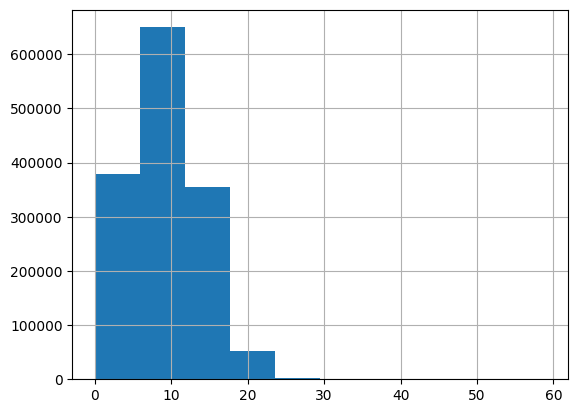

In [188]:
train_words = []
for words in train["words"]:
    for word in words:
        train_words.append(word)
# train_words = [word for token in tokens for word in train["words"]]
train_vocab = sorted(list(set(train_words)))
print("This training dataset have %s words in total, with a vocabulary size of %s \n" % (len(train_words), len(train_vocab)))

train_senten_len = [len(tokens) for tokens in train["words"]]
print("Max sentence length is %d \n" % max(train_senten_len),
      "Min sentence length is %d \n" % min(train_senten_len),
      "Average sentence length  is %d \n"% np.mean(train_senten_len))

This test dataset have 1335296 words in total, with a vocabulary size of 42051 

Max sentence length is 39 
 Min sentence length is 0 
 Average sentence length  is 8 



<AxesSubplot: >

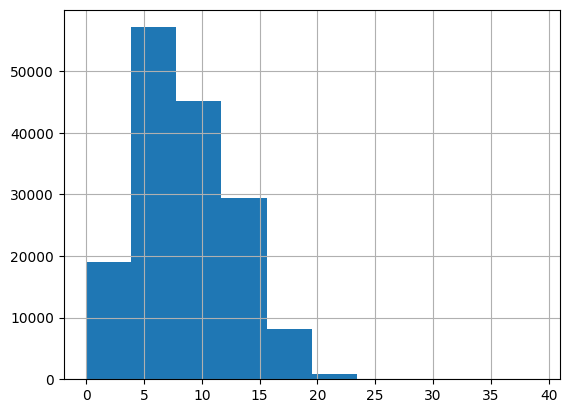

In [89]:
import matplotlib as plt
pd.Series(train_senten_len).hist()

In [90]:
test_words = []
for words in test["words"]:
    for word in words:
        test_words.append(word)
test_vocab = sorted(list(set(test_words)))
print("This test dataset have %s words in total, with a vocabulary size of %s \n" % (
len(test_words), len(test_vocab)))

test_senten_len = [len(tokens) for tokens in test["words"]]
print("Max sentence length is %s \n" % max(test_senten_len),
      "Min sentence length is %d \n" % min(test_senten_len),
      "Average sentence length  is %d \n" % np.mean(test_senten_len))
test["content_len"]= test_senten_len
pd.Series(test_senten_len).hist()

,label,date,topic,comment,pos,neg,final_text,words,comment_len
265663,0,Sun May 31 23:32:01 PDT 2009,NO_QUERY,"[My, dog, always, goes, psycho, when, it, rain...",0,1,dog always goes psycho rains cant slee ep,"[dog, always, goes, psycho, rains, cant, slee,...",8
387273,0,Sat Jun 06 06:13:46 PDT 2009,NO_QUERY,"[Just, doing, some, revision, for, my, Italian...",0,1,revision italian exams monday realising little...,"[revision, italian, exams, monday, realising, ...",8
637524,0,Thu Jun 18 22:38:00 PDT 2009,NO_QUERY,"[hu, kh, nOt, really, LikE, tHis, fRiday]",0,1,hu kh not really like friday,"[hu, kh, not, really, like, friday]",6
1328352,4,Wed Jun 03 04:50:16 PDT 2009,NO_QUERY,"[Yay, Wednesday, Short, day, at, work]",1,0,yay wednesday short day work,"[yay, wednesday, short, day, work]",5
1415932,4,Sat Jun 06 12:46:38 PDT 2009,NO_QUERY,"[Just, met, ronald, man, nak, in, Caf, Royal, ...",1,0,met ronald man nak caf royal world seems small...,"[met, ronald, man, nak, caf, royal, world, see...",13


In [93]:
train["comment_len"] = train_senten_len
train =train.drop(train[train.comment_len==0].index)
outputpath= r'160M_w_emo_w_split_wstop/train_160M.csv'
train.to_csv(outputpath,sep=',',index=False,header=True)
train[100:105]

,label,date,topic,comment,pos,neg,final_text,words,content_len,comment_len
541200,0,Tue Jun 16 18:18:13 PDT 2009,NO_QUERY,"[Nk, luv, rev, My, poor, little, dumpling, In,...",0,1,nk luv rev poor little dumpling holm del vid r...,"[nk, luv, rev, poor, little, dumpling, holm, d...",17,17
750,0,Mon Apr 06 23:11:18 PDT 2009,NO_QUERY,"[Im, off, too, bed, gotta, wake, up, hell, ear...",0,1,bed gotta wake hell early tomorrow morning,"[bed, gotta, wake, hell, early, tomorrow, morn...",7,7
766711,0,Tue Jun 23 13:40:12 PDT 2009,NO_QUERY,"[have, nt, been, able, to, listen, to, it, yet...",0,1,nt able listen yet speakers busted,"[nt, able, listen, yet, speakers, busted]",6,6
285055,0,Mon Jun 01 10:26:09 PDT 2009,NO_QUERY,"[now, remembers, why, solving, relatively, big...",0,1,remembers solving relatively big equation two ...,"[remembers, solving, relatively, big, equation...",10,10
705995,0,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,"[Ate, too, much, feel, sick]",0,1,ate much feel sick,"[ate, much, feel, sick]",4,4


In [28]:
#test["comment_len"] = test_senten_len
test = test.drop(test[test.comment_len==0].index)
outputpath= r'160M_w_emo_w_split/valid_160M.csv'
test.to_csv(outputpath,sep=',',index=False,header=True)
test[:5]

159952


In [ ]:
print(len(test['pos']))

### 创建迷你数据集（用于初期模型调试与调参与快速实验）

In [45]:
# sample 10k datasets as a demo (neg:pos = 1:1)
print("There are %d negative comments.\n" %len(data[data['neg'].isin([1])]))
neg_data = data[data['neg'].isin([1])][:5000]
print("There are %d positive comments.\n" %len(data[data['pos'].isin([1])]))
pos_data = data[data['neg'].isin([0])][:5000]
frame = [pos_data,neg_data]
sample_data= pd.concat(frame)

There are 799999 negative comments.

There are 800000 positive comments.



In [19]:
len(sample_data)

10000

In [46]:
sample_train, sample_test = train_test_split(sample_data, test_size=0.10, random_state=42)

In [47]:
train_words = []
for words in sample_train["words"]:
    for word in words:
        train_words.append(word)
senten_len = [len(tokens) for tokens in sample_train["words"]]
sample_train["comment_len"] = senten_len
outputpath= r'train_10K.csv'
sample_train.to_csv(outputpath,sep=',',index=False,header=True)
sample_train[:5]

,label,comment,pos,neg,final_text,words,comment_len
804895,4,the silent house music to my ears just being ...,1,0,silent house music ears tonight,"[silent, house, music, ears, tonight]",5
804781,4,morning everyone,1,0,morning everyone,"[morning, everyone]",2
801495,4,RoyalGuardofOz Thanks hun hugs,1,0,royalguardofoz thanks hun hugs,"[royalguardofoz, thanks, hun, hugs]",4
801956,4,Apart from Itunes can anyone recommend a good ...,1,0,apart itunes anyone recommend good reasonable ...,"[apart, itunes, anyone, recommend, good, reaso...",10
4171,0,seems to be coming down with a cold which migh...,0,1,seems coming cold might help explain poor sleep,"[seems, coming, cold, might, help, explain, po...",8


In [ ]:
test_words = []
for words in sample_test["words"]:
    for word in words:
        test_words.append(word)
senten_len = [len(tokens) for tokens in sample_test["words"]]
sample_test["comment_len"] = senten_len
outputpath= r'valid_10K.csv'
sample_test.to_csv(outputpath,sep=',',index=False,header=True)
sample_test[:5]